In [2]:
import time as tm

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from   tensorflow import keras

%matplotlib inline

In [3]:
def plot_series(time, series, frmt='-', start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], frmt, label=label)
    plt.xlabel('Time')
    plt.ylabel('Value')
    if label:
        plt.legend()
    plt.grid(True)

### Trend and Seasonality

In [4]:
def trend(time, slope=0):
    return slope * time

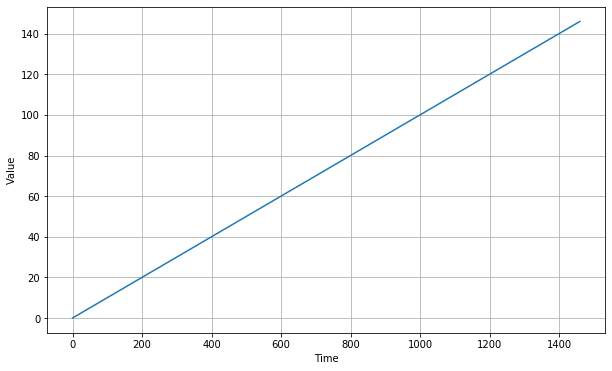

In [5]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = trend(time, 0.1)

plt.figure(figsize=(10, 6))
plot_series(time, series)

In [6]:
def seasonal_pattern(season_time):
    '''An arbitrary pattern'''
    return np.where(season_time < 0.4, 
                    np.cos(2 * np.pi * season_time),
                    1 / np.exp(3 * season_time))

In [7]:
def seasonality(time, period, amplitude=1, phase=0):
    '''Repeat pattern at each period'''
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

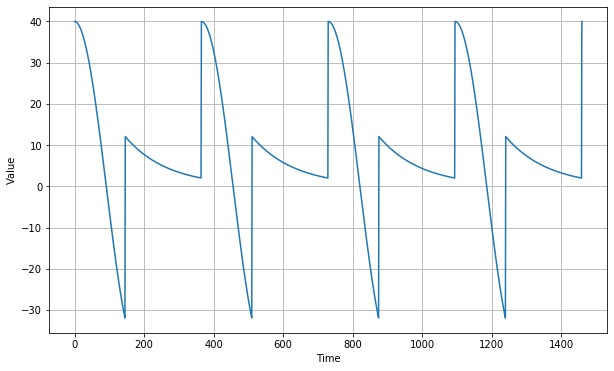

In [8]:
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)

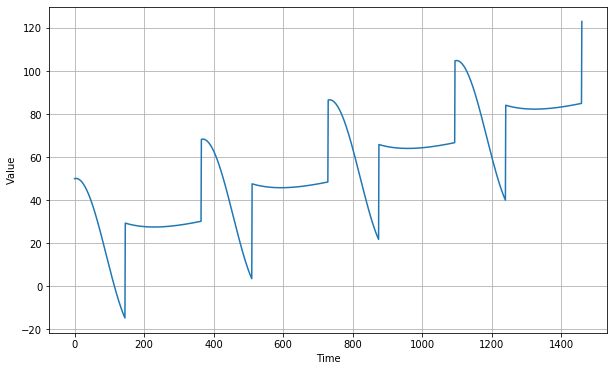

In [9]:
slope = 0.05
series = (baseline 
          + trend(time, slope) 
          + seasonality(time, period=365, amplitude=amplitude))

plt.figure(figsize=(10, 6))
plot_series(time, series)

### Noise

In [10]:
def white_noise(time, noise_level=1, seed=None):
    seed = seed or int(tm.time())
    rnd = np.random.RandomState(seed)
    return noise_level * rnd.randn(len(time))

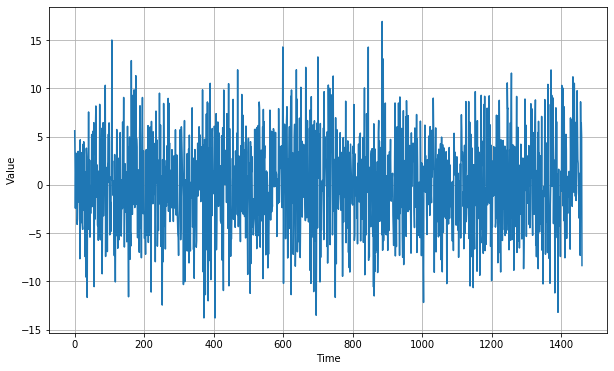

In [11]:
noise_level = 5
noise = white_noise(time, noise_level)

plt.figure(figsize=(10, 6))
plot_series(time, noise)

In [16]:
import time
time.time()

1571239670.51941